In [1]:
import MDAnalysis as mda
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.abspath("/home/jianhuang/rainier/projects/VAE/ProDynaVAE"))
from utils.traj_analysis import *
from utils.plot import *

In [2]:
psf = "/home/jianhuang/rainier/tmp/4shrishti/proa/step1_pdbreader.psf"
xtc = "/home/jianhuang/rainier/tmp/4shrishti/proa/step5_1_align.xtc"

In [3]:
u = mda.Universe(psf, xtc)

# Bonds

In [4]:
get_bonds?

Signature: get_bonds(psf, xtc, atom1_name, atom2_name, every=1, use_atom_type=True)
Docstring:
psf: PSF
xtc: XTC
atom1_name: atomname of the first atom; ; use atomtype if use_atom_type=True
atom2_name: atomname of the second atom
every: frequency of calculation
use_atom_type: whether use atom type; default=True
return: bond length array; unit: Angstrom
File:      ~/rainier/projects/VAE/ProDynaVAE/utils/traj_analysis.py
Type:      function


In [5]:
# use atom types
ca_cb_bond_type_list = get_bonds(psf, xtc, 'CT1', 'CT1', every=200, use_atom_type=True)

In [6]:
# use atom name
ca_cb_bond_list = get_bonds(psf, xtc, 'CA', 'CB', every=200, use_atom_type=False)

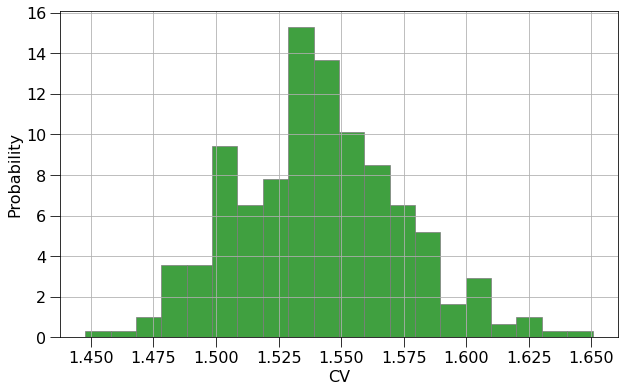

In [7]:
plot_distribution(ca_cb_bond_type_list, bins=20)

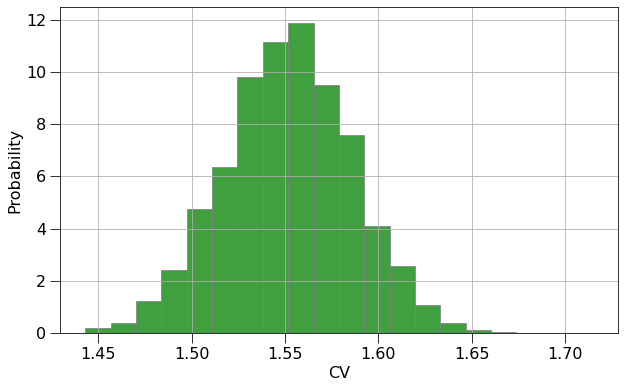

In [8]:
plot_distribution(ca_cb_bond_list, bins=20)

# Angles

In [9]:
get_angles?

Signature:
get_angles(
    psf,
    xtc,
    atom1_name,
    atom2_name,
    atom3_name,
    every=1,
    use_atom_type=True,
)
Docstring:
psf: PSF
xtc: XTC
atom1_name: atomname of the first atom; use atomtype if use_atom_type=True
atom2_name: atomname of the second atom
atom3_name: atomname of the third atom
every: frequency of calculation
use_atom_type: whether use atom type; default=False
return: angle list in degrees
File:      ~/rainier/projects/VAE/ProDynaVAE/utils/traj_analysis.py
Type:      function


In [10]:
angles = get_angles(psf, xtc, 'N', 'CA', 'CB', every=200, use_atom_type=False)

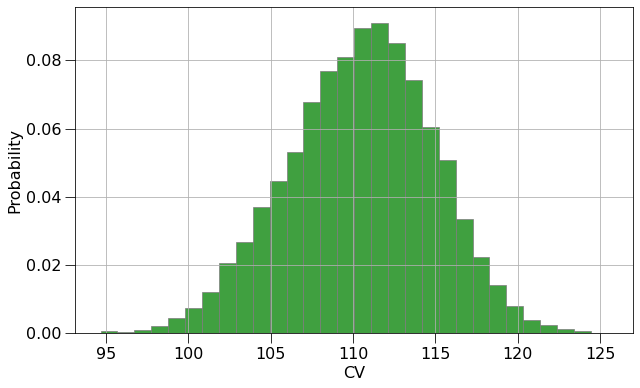

In [11]:
plot_distribution(angles, bins=30)

# Dihedrals

In [12]:
get_bb_impropers?

# each peptide bond has two backbone dihedrals
# 1. C CT1 NH1 O
# 2. NH1 C CT1 H

Signature: get_bb_impropers(psf, xtc, every=1)
Docstring:
psf: PSF
xtc: XTC
every: frequency of calculation
return: impropers in degrees
File:      ~/rainier/projects/VAE/ProDynaVAE/utils/traj_analysis.py
Type:      function


In [13]:
bbimpropers = get_bb_impropers(psf, xtc, every=200)

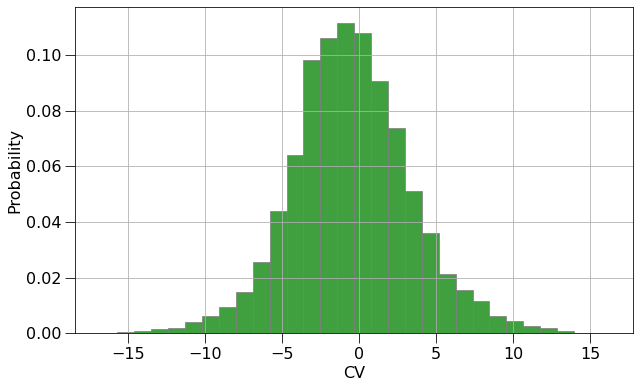

In [14]:
plot_distribution(bbimpropers, bins=30)

In [15]:
get_omegas?

Signature: get_omegas(psf, xtc, every=1)
Docstring:
psf: PSF
xtc: XTC
every: frequency of calculation
return: array of omega values (in degrees)
File:      ~/rainier/projects/VAE/ProDynaVAE/utils/traj_analysis.py
Type:      function


In [16]:
omegas = get_omegas(psf, xtc, every=200)

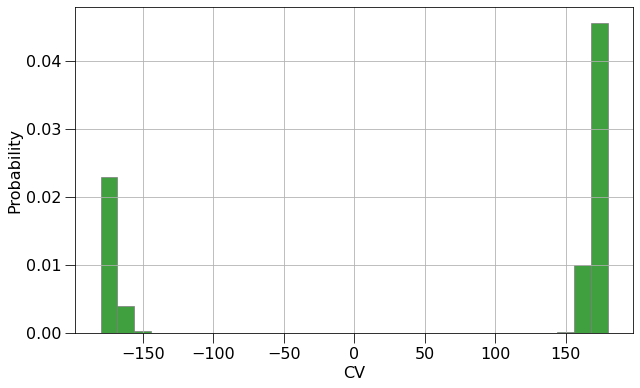

In [17]:
plot_distribution(omegas, bins=30)

In [18]:
# a more general dihedral
get_dihedrals?

Signature:
get_dihedrals(
    psf,
    xtc,
    atom1_name,
    atom2_name,
    atom3_name,
    atom4_name,
    every=1,
    use_atom_type=True,
)
Docstring:
psf: PSF
xtc: XTC
atom1_name: atomname of the first atom; ; use atomtype if use_atom_type=True
atom2_name: atomname of the second atom
atom3_name: atomname of the third atom
atom4_name: atomname of the fourth atom
every: frequency of querying the trajectory
use_atom_type: whether use atom type; default=True
return: dihedral array in degrees
File:      ~/rainier/projects/VAE/ProDynaVAE/utils/traj_analysis.py
Type:      function


In [19]:
dihe_example = get_dihedrals(psf, xtc, 'N', 'CA', 'C', 'N', every=200, use_atom_type=False)

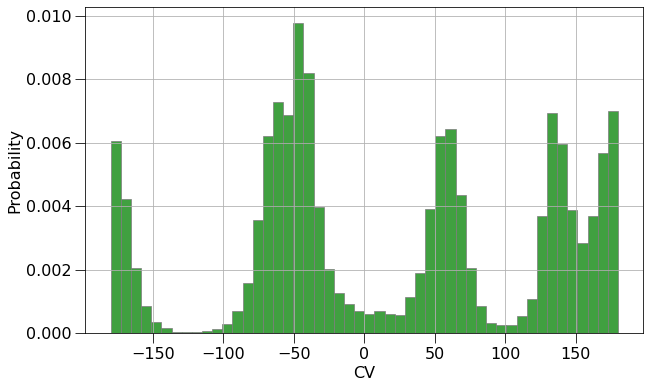

In [27]:
plot_distribution(dihe_example, bins=50)

# Testing: Gaussian distributions

bonds:

$energy = 0.5 * k_b * (x - b0)^2$

for CT1-CT1 bonds:

$k_b = 1.861880e+05$

$b_0 = 1.500000e-01$

the ideal Gaussian distribution:

$e^{-\beta * 0.5 * k_b *(b - b_0)^2}$

In [21]:
# unit: ang
b0 = 1.5

In [22]:
# unit: kj / (mol * ang^2)
kb = 1.86188e3

In [23]:
# unit: kj
beta = 1/ (1.380649e-23 * 298)

In [24]:
beta

2.4305270188053424e+20

In [ ]:
np.sum(y)

In [ ]:
data = ca_cb_bond_type_list.flatten()
bin_number=100

fig, ax = plt.subplots(figsize=(8, 8))
n, bins, patches = ax.hist(data, bin_number, density=True, alpha=0.75, color='green', edgecolor='gray')
ax.plot(x, y/(x[1] - x[0]), 'r--')
# ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# ax.set_ylim([0, 1])
ax.set_xlabel("CV", fontsize=16)
ax.set_ylabel("Probability", fontsize=16)
ax.tick_params(axis='both', which='major', length=10, labelsize=16)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()